In [49]:
import numpy as np
from scipy import misc
import pylab as plt


def phaseCorr(a, b):
    '''
    Calculate the discrete 2D Fourier transform of both A and B
        G_a = F{A}
        G_b = F{B}
    Calculate the cross-power spectrum by taking the complex conjugate of G_b,
        multiplying the Fourier transforms together elementwise, and normalizing
        the product elementwise
        R = (G_a %*% G_B*) / (|G_a G_b*|)
            %*% is the Hadamard (entry-wise) product
    Obtain normalized cross-correlation by applying the inverse Fourier transform
        r = F^-1{R}
    Adapted from Michael Ting's implementation.
    '''
    G_a = np.fft.fft2(a)
    G_b = np.fft.fft2(b)
    R = G_a*np.ma.conjugate(G_b)
    R /= np.absolute(R)
    r = np.fft.ifft2(R).real
    return r

def getPhaseCorrShift(a, b):
    ''' Returns the indexes to shift '''
    r = phaseCorr(a, b)
    return np.unravel_index(r.argmax(), r.shape)

def shiftImage(img,shift):
    M = np.float32([[1,0,shift[1]],[0,1,shift[0]]])
    return cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

def registerImage(img,ref):
    shift = getPhaseCorrShift(ref,img)
    return shift, shiftImage(img,shift)


registration.ipynb


<IPython.core.display.Javascript object>


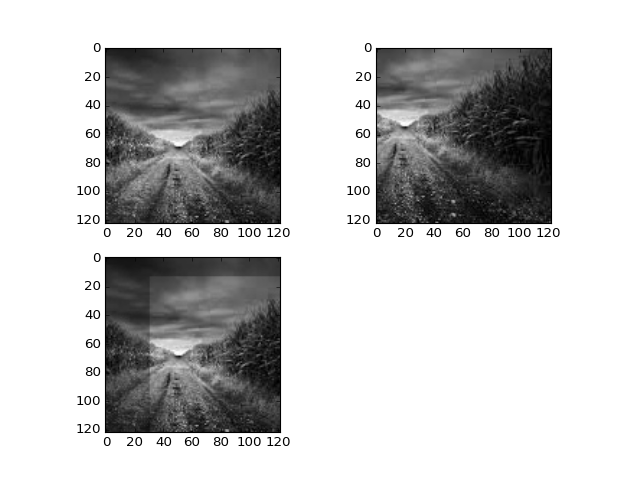

In [57]:
%matplotlib notebook

img1 = rgb2gray(misc.imread('/home/joao/lib/Phase_Correlation/road1.jpg'))
img2 = rgb2gray(misc.imread('/home/joao/lib/Phase_Correlation/road2.jpg'))

fig = plt.figure()
fig.add_subplot(2,2,1)
plt.imshow(img1,cmap='gray')

fig.add_subplot(2,2,3)
plt.imshow(img1,cmap='gray')

shift,res = registerImage(img2,img1)
plt.imshow(res,alpha=0.3,cmap='gray')

fig.add_subplot(2,2,2)
plt.imshow(img2,cmap='gray')


